In [32]:
# https://qiita.com/sayuyuyu/items/4ca06a851fca41f6b270
# https://zenn.dev/noriyu/articles/484570e025c8f9

import spotipy
import pprint
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth

In [16]:
my_id = ''
my_secret = ''

In [17]:
ccm = SpotifyClientCredentials(client_id = my_id, client_secret = my_secret)
sp = spotipy.Spotify(client_credentials_manager = ccm)

In [18]:
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=my_id,
                                               client_secret=my_secret,
                                               redirect_uri="http://localhost:3000/callback",
                                               scope="user-read-recently-played"))

In [21]:
# プレイリストから曲を取得
def get_to_playlist(playlist_id):
    playlist = sp.playlist(playlist_id)
    track_ids = []
    for item in playlist['tracks']['items']:
        track = item['track']
        if not track['id'] in track_ids:
            track_ids.append(track['id'])
        else:
            for item in playlist['tracks']['items']:
                track = item['track']
                if not track['id'] in track_ids:
                    track_ids.append(track['id'])
    return track_ids


In [26]:
# https://open.spotify.com/playlist/0wjOlgmfNp3Iha2q1UoW8s
playlist_id = '0wjOlgmfNp3Iha2q1UoW8s'

res = get_to_playlist(playlist_id)
print(res)

['2tlOVDJ3lQsUxz22vPJ4c4', '1P17dC1amhFzptugyAO7Il']


In [27]:
music_id = "2tlOVDJ3lQsUxz22vPJ4c4"
result = sp.audio_features(music_id)
pprint.pprint(result)

[{'acousticness': 0.172,
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2tlOVDJ3lQsUxz22vPJ4c4',
  'danceability': 0.616,
  'duration_ms': 189773,
  'energy': 0.975,
  'id': '2tlOVDJ3lQsUxz22vPJ4c4',
  'instrumentalness': 1.62e-06,
  'key': 10,
  'liveness': 0.143,
  'loudness': -0.425,
  'mode': 0,
  'speechiness': 0.208,
  'tempo': 132.054,
  'time_signature': 4,
  'track_href': 'https://api.spotify.com/v1/tracks/2tlOVDJ3lQsUxz22vPJ4c4',
  'type': 'audio_features',
  'uri': 'spotify:track:2tlOVDJ3lQsUxz22vPJ4c4',
  'valence': 0.742}]


In [28]:
music_id = "1P17dC1amhFzptugyAO7Il"
result = sp.audio_features(music_id)
pprint.pprint(result)

[{'acousticness': 0.204,
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1P17dC1amhFzptugyAO7Il',
  'danceability': 0.766,
  'duration_ms': 211853,
  'energy': 0.709,
  'id': '1P17dC1amhFzptugyAO7Il',
  'instrumentalness': 1.41e-05,
  'key': 9,
  'liveness': 0.126,
  'loudness': -6.471,
  'mode': 0,
  'speechiness': 0.123,
  'tempo': 128.07,
  'time_signature': 4,
  'track_href': 'https://api.spotify.com/v1/tracks/1P17dC1amhFzptugyAO7Il',
  'type': 'audio_features',
  'uri': 'spotify:track:1P17dC1amhFzptugyAO7Il',
  'valence': 0.506}]


In [30]:
def getTrackFeatures(id):
    meta = sp.track(id)
    features = sp.audio_features(id)

    name = meta['name']
    album = meta['album']['name']
    artist = meta['album']['artists'][0]['name']
    length = meta['duration_ms']
    popularity = meta['popularity']
    key = features[0]['key']
    mode = features[0]['mode']
    danceability = features[0]['danceability']
    acousticness = features[0]['acousticness']
    energy = features[0]['energy']
    instrumentalness = features[0]['instrumentalness']
    liveness = features[0]['liveness']
    loudness = features[0]['loudness']
    speechiness = features[0]['speechiness']
    tempo = features[0]['tempo']
    time_signature = features[0]['time_signature']
    valence = features[0]['valence']
    release_date = ""

    track = [name, album, artist, release_date, length, popularity, key, mode, danceability, acousticness,
             energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature, valence]
    return track


In [33]:
def id_to_csv(track_ids):
    tracks = []
    for track_id in track_ids:
        track = getTrackFeatures(track_id)
        tracks.append(track)

    df = pd.DataFrame(tracks, columns=['name', 'album', 'artist', 'release_date', 'length', 'popularity', 'key', 'mode', 'danceability',
                      'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature', 'valence'])
    df.head()

    df.to_csv('myplaylist.csv', encoding='utf-8', index=False)
    print("CSVファイルが作成されました。")

    return df

In [34]:
if __name__ == '__main__':
    ids = get_to_playlist("0wjOlgmfNp3Iha2q1UoW8s")
    id_to_csv(ids)

CSVファイルが作成されました。


In [35]:
# https://qiita.com/sayuyuyu/items/4ca06a851fca41f6b270#%E3%83%87%E3%83%BC%E3%82%BF%E3%82%92%E5%88%86%E6%9E%90%E3%81%99%E3%82%8B

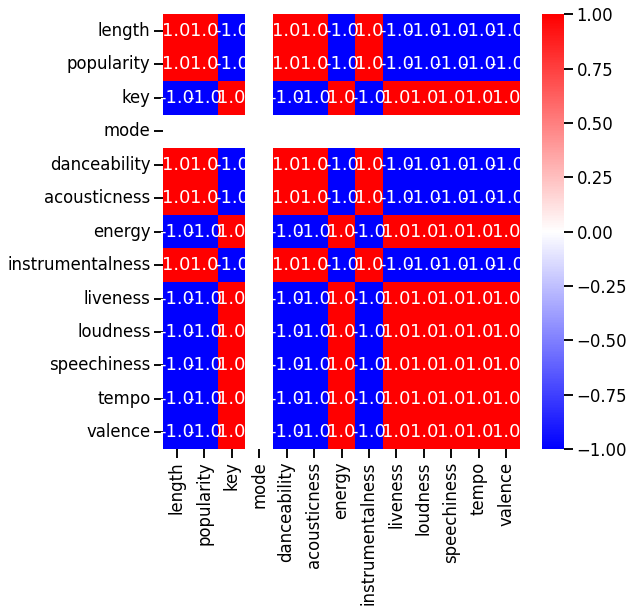

In [37]:
import numpy as numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_score = pd.read_csv(
    'myplaylist.csv', 
    index_col= "name",
    usecols=["name", "length", "popularity", "key", "mode", "danceability",
             "acousticness", "energy", "instrumentalness", "liveness",
             "loudness", "speechiness", "tempo", "valence"
    ])

df_corr = df_score.corr()

sns.set_context(context="talk")
fig = plt.subplots(figsize=(8, 8))
sns.heatmap(df_corr, annot=True, fmt='.1f', cmap='bwr', vmin=-1, vmax=1)
plt.show()
